In [ ]:
#
# The challenge and "fun" of categorical data
#
#

#
# For crime data..what if police record the SexAssignedAtBirth of person making the complaint  -- (Male, Female)
#

# Options to handle categorical data
#
# 1. Create a new column in our dataframe....  Create a new column called GenderValue   set it to 0 for male, 1 for female
#   
#    Is it possible that a model would Predict that the MostlIkely Gender of a person reporting domestic violence in aa certaian zip code is 0.78
#      NOT GOOD - DONT DO THIS!
#
# 2. What we want to to separete the features so that we understand how each feature category influences other variables.
#
#    ONE-HOT Encoding
#
#                       MaleReporting       FemaleReporting
#                            1                     0
#                            0                     1
#
#
#
#



In [ ]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
url = 'https://pages.ospreys.biz/datasets/chicago_small.csv'
r = requests.get( url)
cdf = pd.read_csv( StringIO(r.text))

In [6]:
cdf.drop('Unnamed: 19', axis=1, inplace=True)
cdf.drop('Unnamed: 18', axis=1, inplace=True)
cdf.drop('Unnamed: 17', axis=1, inplace=True)
cdf.drop('Unnamed: 16', axis=1, inplace=True)
cdf.drop('Unnamed: 0', axis=1, inplace=True)


In [8]:
#
# Aadd in the one-hot columns
#
cdf['MaleReporting']    = 0 
cdf['FemaleReporting']  = 0



In [13]:
cdf['MaleReporting'] = np.where(  cdf['ReportingSex'].eq('M'), 1, 0   )
cdf['FemaleReporting'] = np.where(  cdf['ReportingSex'].eq('F'), 1, 0   )




In [ ]:
cdf.head(1000)

# How many Reporting Beats are there?
#unique_beats = cdf['Beat'].unique()

#unique_beats

#How many Reporting Beats are there?
unique_districts = cdf['District'].unique()

unique_districts

#
#   How to encode this?
#
#      District                     District10, Diistrct11, District1, District5
#         5                             0             0         0          1
#         1                             0             0         1          0
#        11                             0             1         0          0    


array([10, 11,  1,  5, 16,  3,  7,  8,  6, 14,  4,  9, 12, 25,  2, 17, 20,
       15, 24, 22, 19, 18, 31], dtype=int64)

In [16]:
X = cdf[[ 'MaleReporting', 'FemaleReporting']]
y=cdf['Domestic']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_predictions = model.predict(X_test)

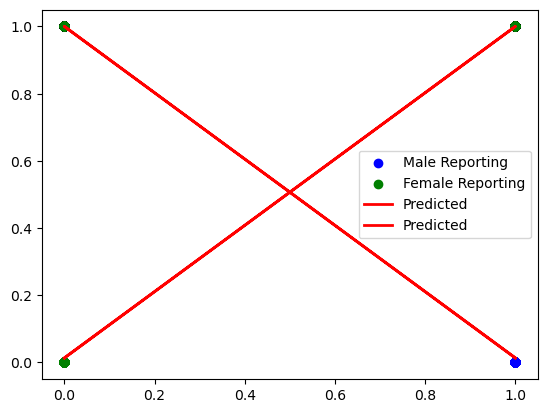

In [24]:
plt.scatter(X['MaleReporting'],y,color="blue",label="Male Reporting")
plt.scatter(X['FemaleReporting'],y,color="green",label="Female Reporting")
plt.plot( X_test, y_predictions, color='red',linewidth=2, label="Predicted")
plt.legend()